# Segunda Avaliação de Física Computacional II

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 31/03/2021

In [1]:
import matplotlib.pyplot as plt
from vpython import *
import random as rd
import numpy as np
import time

%matplotlib notebook

<IPython.core.display.Javascript object>

## Problema 5

Vamos resolver uma versão simplificada do *problema de cobertura dos dímeros*. Basicamente, vamos considerar uma rede como $N\times N$ slots e vamos determinar quantos dímeros podem ser encaixados no nosso grid sem que haja sobreposição de dímeros. Para tal, utilizaremos o método do recozimento simulado para encontrar o mínimo de energia do nosso sistema. Essa energia será mínima quando a quantidade de dímeros for máxima no nosso grid. Para nossa simulação, vamos utilizar $N=50$.

### Letra a)

Começamos definindo algumas constantes que iremos utilizar ao longo do problema:

In [2]:
tau = 10000
T0 = 1000
N = 50

Vamos definir uma função que irá implementar o resfriamento do nosso sitema:

In [3]:
def cool_T(t):
    return T0 * np.exp(-t/tau)

Agora definimos o nosso grid baseado no enunciado do problema. Note que nossos grid precisam ser do tipo `int` e `bool` para definirmos para onde os dímeros irão se mover:

In [4]:
grid = np.zeros([N,N], int)
grid_vert = np.zeros([N,N], bool)

Agora definimos uma função que irá alocar os dímeros no nosso grid:

In [5]:
def loc_Dim(t):
    pos_x, pos_y = rd.randint(0,N-2), rd.randint(0,N-2)
    side, down = 1, 1
    vert = 0
    
    if pos_x == N-1:
        side = -side
    elif pos_y == N-1:
        down = -down
        
    if rd.choice(['side','down']) == 'side':
        vert = -1
        dim = [[pos_x, pos_y], [pos_x+side, pos_y]]
    else:
        vert = 1
        dim = [[pos_x, pos_y], [pos_x, pos_y+down]]
    
    if grid[dim[0][0],dim[0][1]] == 0 and grid[dim[1][0],dim[1][1]] == 0:
        grid[dim[0][0],dim[0][1]], grid[dim[1][0],dim[1][1]] = 1, 1
        grid_vert[dim[0][0],dim[0][1]], grid_vert[dim[1][0],dim[1][1]] = vert, vert
        
        return 1
        
    elif grid[dim[0][0],dim[0][1]] != 0 and grid[dim[1][0],dim[1][1]] != 0:
        if anly(t) == True:
            if grid_vert[dim[0][0],dim[0][1]] == vert and grid_vert[dim[1][0],dim[1][1]] == vert:
                grid[dim[0][0],dim[0][1]], grid[dim[1][0],dim[1][1]] = 0, 0
                grid_vert[dim[0][0],dim[0][1]], grid_vert[dim[1][0],dim[1][1]] = 0, 0
                
                return -1
            
            return 0
        else:
            return 0
        
    elif grid[dim[0][0],dim[0][1]] == 0 and grid[dim[1][0],dim[1][1]] != 0:
        
        return 0
    elif grid[dim[0][0],dim[0][1]] != 0 and grid[dim[1][0],dim[1][1]] == 0:
        
        return 0

Agora definimos uma função que irá determinar se o dímero será alocado ou não em algum slot do grid:

In [6]:
def anly(t):
    if P_a(1000, 0, cool_T(t)) > rd.random():
        return True
    else:
        return False

Vamos implementar uma função que irá calcular a probabilidade de se obter uma transição de estado mediante a seguinte relação:

$$P_{a}= \left\{\begin{matrix} 1,& \mathrm{se }& E_{j}\leq E_{i} \\ \text{exp}[-\beta(E_{j}-E_{i})],& \mathrm{se }& {E_{j}>E_{i}}\end{matrix} \right.$$ 

In [7]:
def P_a(E_j, E_i, T):
    beta = 1/T
    
    if E_j <= E_i:
        return 1
    else:
        return np.exp(-beta*(E_j - E_i))

Seja $E_{i}=0$ o estado de menor energia, temos então que a nossa condição de repetição será:

$$\varepsilon\leq T_{0}\cdot\text{exp}[-1/\tau]$$

Essa será a condição do nosso loop. Dessa forma, vamos implemetá-lo:

In [8]:
t = 0
eps = 1e-5
pontE = []
t0 = time.time()
dimers = 0

while eps <= cool_T(t):
    t += 1
    dimers += loc_Dim(t)
    pontE.append(-dimers) 
    
t1 = time.time()

Por fim, vamos aos plots. Como de costume, começamos criando uma função para melhorar a estética dos plots:

In [9]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora realizamos o plot:

<IPython.core.display.Javascript object>


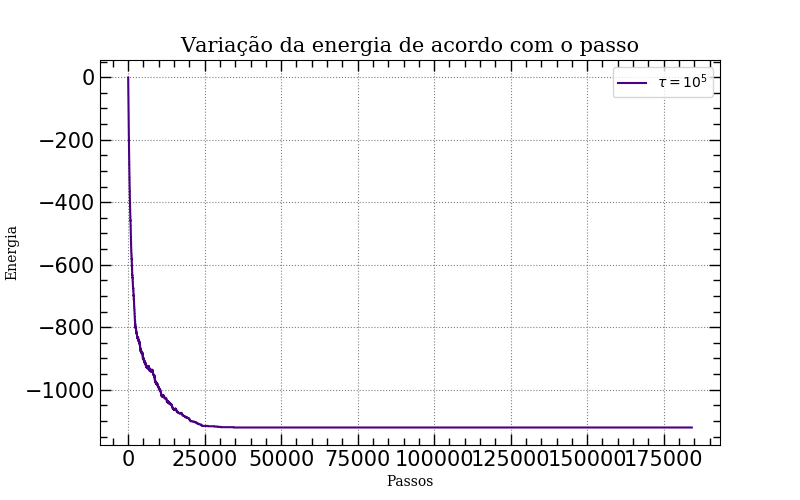

In [10]:
X = list(np.arange(0,t,t/len(pontE)))

plt.figure(figsize=(8,5))

plt.plot(X,pontE, label=r"$\tau=10^{5}$", color="indigo")
plt.title('Variação da energia de acordo com o passo', family='serif', fontsize=15)
plt.ylabel("Energia", family='serif', fontsize=10)
plt.xlabel("Passos", family='serif', fontsize=10)
plt.legend(loc='best')
opt_plot()

$\blacksquare$

### Letra b)

Agora vamos realizar uma animação que irá adicionar os dímeros ao nosso grid. Como o ambiente do Jupyter nçao lida muito bem com animações, o código será exposto abaixo mas a célula não será executada. O código na íntegra será exposto num arquivo a parte intitulado `dimer_covering.py`.

In [ ]:
N = 20
grid = np.zeros([N,N], int)
grid_vert = np.zeros([N,N], int)

my_scene = canvas(title='Cobrimento de dímeros',
     width=600, height=200,
     center=vector(0,0,0),
     background=color.black)

for i in range(N):
    for j in range(N):
        ball = sphere(pos=vector(i,j,0),
                        radius=0.2,
                        color=vector(255,255,255))

def putDim(t):
    pos_x, pos_y = rd.randint(0,N-2), rd.randint(0,N-2)
    side, down = 1, 1
    vert = 0
    if pos_x == N-1:
        side = -side
    elif pos_y == N-1:
        down = -down
        
    if rd.choice(['side','down']) == 'side':
        vert = -1
        dim = [[pos_x, pos_y], [pos_x+side, pos_y]]
    else:
        vert = 1
        dim = [[pos_x, pos_y], [pos_x, pos_y+down]]
    
    if grid[dim[0][0],dim[0][1]] == 0 and grid[dim[1][0],dim[1][1]] == 0:
        grid[dim[0][0],dim[0][1]], grid[dim[1][0],dim[1][1]] = 1, 1
        if vert == 1:
            for p in range(2):
                ball = sphere(pos=vector(dim[p][0],dim[p][1],0),
                            radius=0.2,
                            color=vector(50,0,0))
            grid_vert[dim[0][0],dim[0][1]], grid_vert[dim[1][0],dim[1][1]] = vert, vert
            
        elif vert == -1:
            for p in range(2):
                ball = sphere(pos = vector(dim[p][0],dim[p][1],0),
                            radius = 0.2,
                            color = vector(0,0,50))
            grid_vert[dim[0][0],dim[0][1]], grid_vert[dim[1][0],dim[1][1]] = vert, vert
        return 1
        
    elif grid[dim[0][0],dim[0][1]] != 0 and grid[dim[1][0],dim[1][1]] != 0:
    
        if anly(t) == True:
            if grid_vert[dim[0][0],dim[0][1]] == vert and grid_vert[dim[1][0],dim[1][1]] == vert:
                grid[dim[0][0],dim[0][1]], grid[dim[1][0],dim[1][1]] = 0, 0
                grid_vert[dim[0][0],dim[0][1]], grid_vert[dim[1][0],dim[1][1]] = 0, 0
                for p in range(2):
                    ball = sphere(pos=vector(dim[p][0],dim[p][1],0),
                                radius=0.2,
                                color=vector(255,255,255))
                return -1
            return 0
        else:
            return 0
        
    elif grid[dim[0][0],dim[0][1]] == 0 and grid[dim[1][0],dim[1][1]] != 0:
        return 0
    elif grid[dim[0][0],dim[0][1]] != 0 and grid[dim[1][0],dim[1][1]] == 0:
        return 0

t = 0
eps = 1e-5
while eps <= cool_T(t):
    t += 1
    loc_Dim(t)
t1 = time.time()

Seguindo as indicações do problema, os dímeros postos na vertical foram representado em vermelho eqnaunto os que foram postos na horizontal foram representados em azul. Note que apesar de a animação deixar slots vazios em pontos específicos isso não altera o resultado geral do cálculo, uma vez que o programa não consegue distinguir entre um dímero vermelho e azul.

$\blacksquare$

### Letra c)

Vamos agora analisar alguns casos específicos para a variável $\tau$:

* $\tau=10$: O resfriamento ocorre demasiadamente rápido, o que ocasiona no aparecimento de vários slots vazios.
* $\tau=10^{2}$: O resfriamento ocorre mais lentamente que o caso anterior, mas ainda sim ocorre rápido de forma a ainda termo um número considerável de slots vazios.
* $\tau=10^{3}$: O resfriamento ocorre mais lentamente que o caso anterior mas ainda assim temos a presença de alguns slots vazios.
* $\tau=10^{4}$: O resfriamento ocorre bem mais lentamente, note que a quantidade de slots vazios é muito menor que no caso anterior.
* $\tau=10^{5}$: O resfriamento ocorre bem mais lentamente que todos os casos anteriores e a quantidade de slots vazios se torna mínima.

$\blacksquare$